<font size="5"> __Importing the required libraries__:</font>

In [105]:
import pandas as pd # for data processing,I/O file operations
import numpy as np # for numerical computations
import matplotlib.pyplot as plt # for visualization of different kinds of plots
import seaborn as sns # for visualization
import matplotlib
import squarify # pip install squarify (algorithm for treemap)&lt;/pre&gt;
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

<font size="5"> __Importing the dataset__:</font>

In [4]:
df=pd.read_csv('Geely.csv')

<font size="5"> __Analyzing the dataset__:</font>

In [5]:
pd.options.display.max_columns=None
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fuelsystem,cylindernumber,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,3.47,2.68,9.0,111,5000,21,27,other,"2,3,4",13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,3.47,2.68,9.0,111,5000,21,27,other,"2,3,4",16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,152,2.68,3.47,9.0,154,5000,19,26,other,"5,6",16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,109,3.19,3.40,10.0,102,5500,24,30,other,"2,3,4",13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,136,3.19,3.40,8.0,115,5500,18,22,other,"5,6",17450.0


In [6]:
df.shape

(205, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  boreratio         205 non-null    float64
 1

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<font size="5"> __Cleaning the dataset__:</font>

In [9]:
#the Car_id is of no use, so we remove it
df=df.drop('car_ID', axis=1)

In [10]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fuelsystem,cylindernumber,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,3.47,2.68,9.0,111,5000,21,27,other,"2,3,4",13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,3.47,2.68,9.0,111,5000,21,27,other,"2,3,4",16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,152,2.68,3.47,9.0,154,5000,19,26,other,"5,6",16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,109,3.19,3.40,10.0,102,5500,24,30,other,"2,3,4",13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,136,3.19,3.40,8.0,115,5500,18,22,other,"5,6",17450.0


In [11]:
#checking for missing values
df.isnull().any()

symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
enginesize          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
fuelsystem          False
cylindernumber      False
price               False
dtype: bool

In [12]:
#chacking for duplicated values
df.duplicated().sum()

0

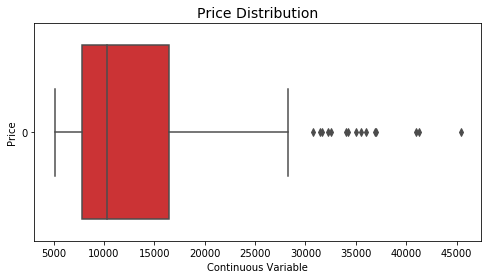

In [13]:
#showing outlier in our response variable (price)
plt.figure(figsize = [8,4])
sns.boxplot(data=df['price'], orient="h", palette="Set1")
plt.title("Price Distribution", fontsize = 14)
plt.ylabel("Price")
plt.xlabel("Continuous Variable")
plt.show()

__The boxplot shows that there are a number of observations that have prices upper than 30000. these points can be considered as outlier.__

__However, we do not remove them yet, until we run the model.__

In [14]:
#Extracting Car Company Name from the CarName  
df.insert(0, 'CarCompany', df['CarName'].str.split(' ', expand=True)[0])
df=df.drop('CarName', axis=1)
df.head()

,CarCompany,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fuelsystem,cylindernumber,price
0,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,3.47,2.68,9.0,111,5000,21,27,other,"2,3,4",13495.0
1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,3.47,2.68,9.0,111,5000,21,27,other,"2,3,4",16500.0
2,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,152,2.68,3.47,9.0,154,5000,19,26,other,"5,6",16500.0
3,audi,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,109,3.19,3.40,10.0,102,5500,24,30,other,"2,3,4",13950.0
4,audi,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,136,3.19,3.40,8.0,115,5500,18,22,other,"5,6",17450.0


In [15]:
#unique levels of Company Name
df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

__It seems that, there are some company names that are misspelled:__

In [16]:
#replacing misspelled names
df['CarCompany']=df['CarCompany'].replace({'Nissan':'nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'}, regex=True)

In [17]:
#unique levels of Company Name
df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype=object)

In [18]:
#changing data type of "symboling" from numerical to categorical
df['symboling']=df['symboling'].astype(str)

In [19]:
#for having better analysis it is better to seperate numerical and categorical variables
cat_col= df.select_dtypes(include=['object']).columns
num_col= df.select_dtypes(exclude=['object']).columns
df_cat=df[cat_col]
df_num=df[num_col]

In [20]:
print('shape of categorical dataset: ',df_cat.shape)
print('shape of numerical dataset: ',df_num.shape)

shape of categorical dataset:  (205, 11)
shape of numerical dataset:  (205, 14)


<font size="5"> __Visualizing the dataset__:</font>

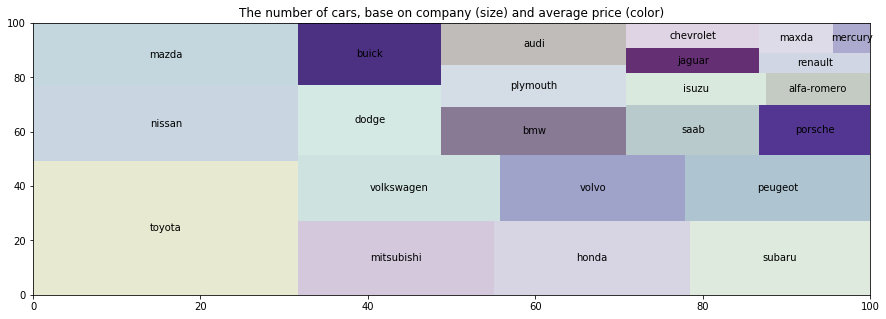

In [21]:
#visulizing CarCompany
plt.figure(figsize = [15,5])
CarCompany=df_cat['CarCompany'].value_counts().rename_axis('CarCompany').reset_index(name='count')
Price=df.groupby('CarCompany')[['price']].aggregate(lambda x: x.mean().round(0))
CarCompany=CarCompany.merge(Price, left_on=['CarCompany'], right_on=['CarCompany'], how='outer')

cmap = matplotlib.cm.Purples
mini=min(CarCompany['price'])
maxi=max(CarCompany['price'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in CarCompany['price']]
 
# Change color
squarify.plot(sizes=CarCompany['count'], label=CarCompany['CarCompany'], alpha=.8 )
squarify.plot(sizes=CarCompany['count'], alpha=.8, color=colors )
plt.title('The number of cars, base on company (size) and average price (color)')
plt.show()

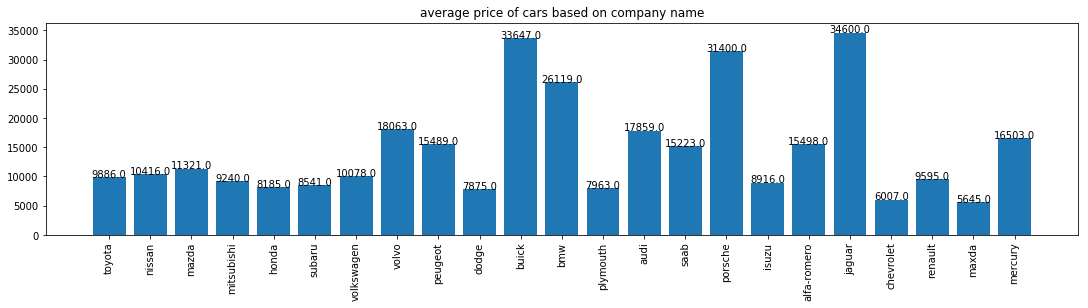

In [22]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5)


x_pos = np.arange(len(CarCompany['CarCompany']))
# Create bars
plt.bar(x_pos, CarCompany['price'])

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
addlabels(CarCompany['CarCompany'], CarCompany['price'].round(2))

# Rotation of the bar names
plt.xticks(x_pos, CarCompany['CarCompany'], rotation=90)
 
plt.title('average price of cars based on company name')
    
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)
 
# Show graphic
plt.show()

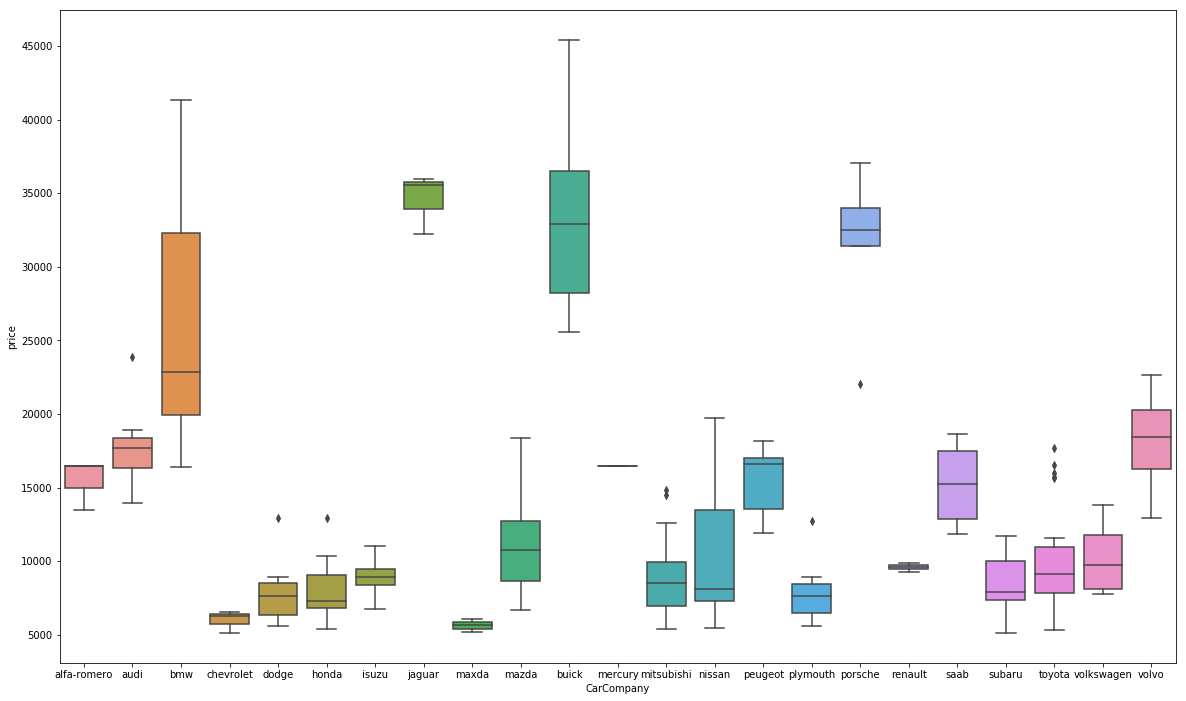

In [23]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'CarCompany', y = 'price', data = df)

__As is shown, about 15% (the largest share) of cars are from "toyota" company__

__the most expensive cars are from "jaguar", "buick" and "porsche" company. However, they only account a small number of cars.__


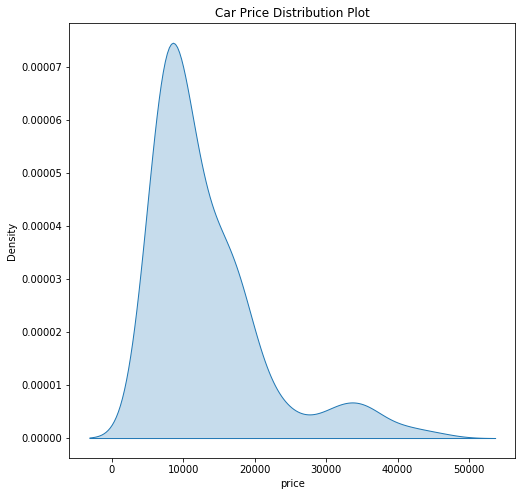

In [24]:
# Visualizing the distribution of car prices
plt.figure(figsize=(8,8))
plt.title('Car Price Distribution Plot')
sns.kdeplot(df['price'], shade=True)
plt.show()

In [25]:
df_num.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

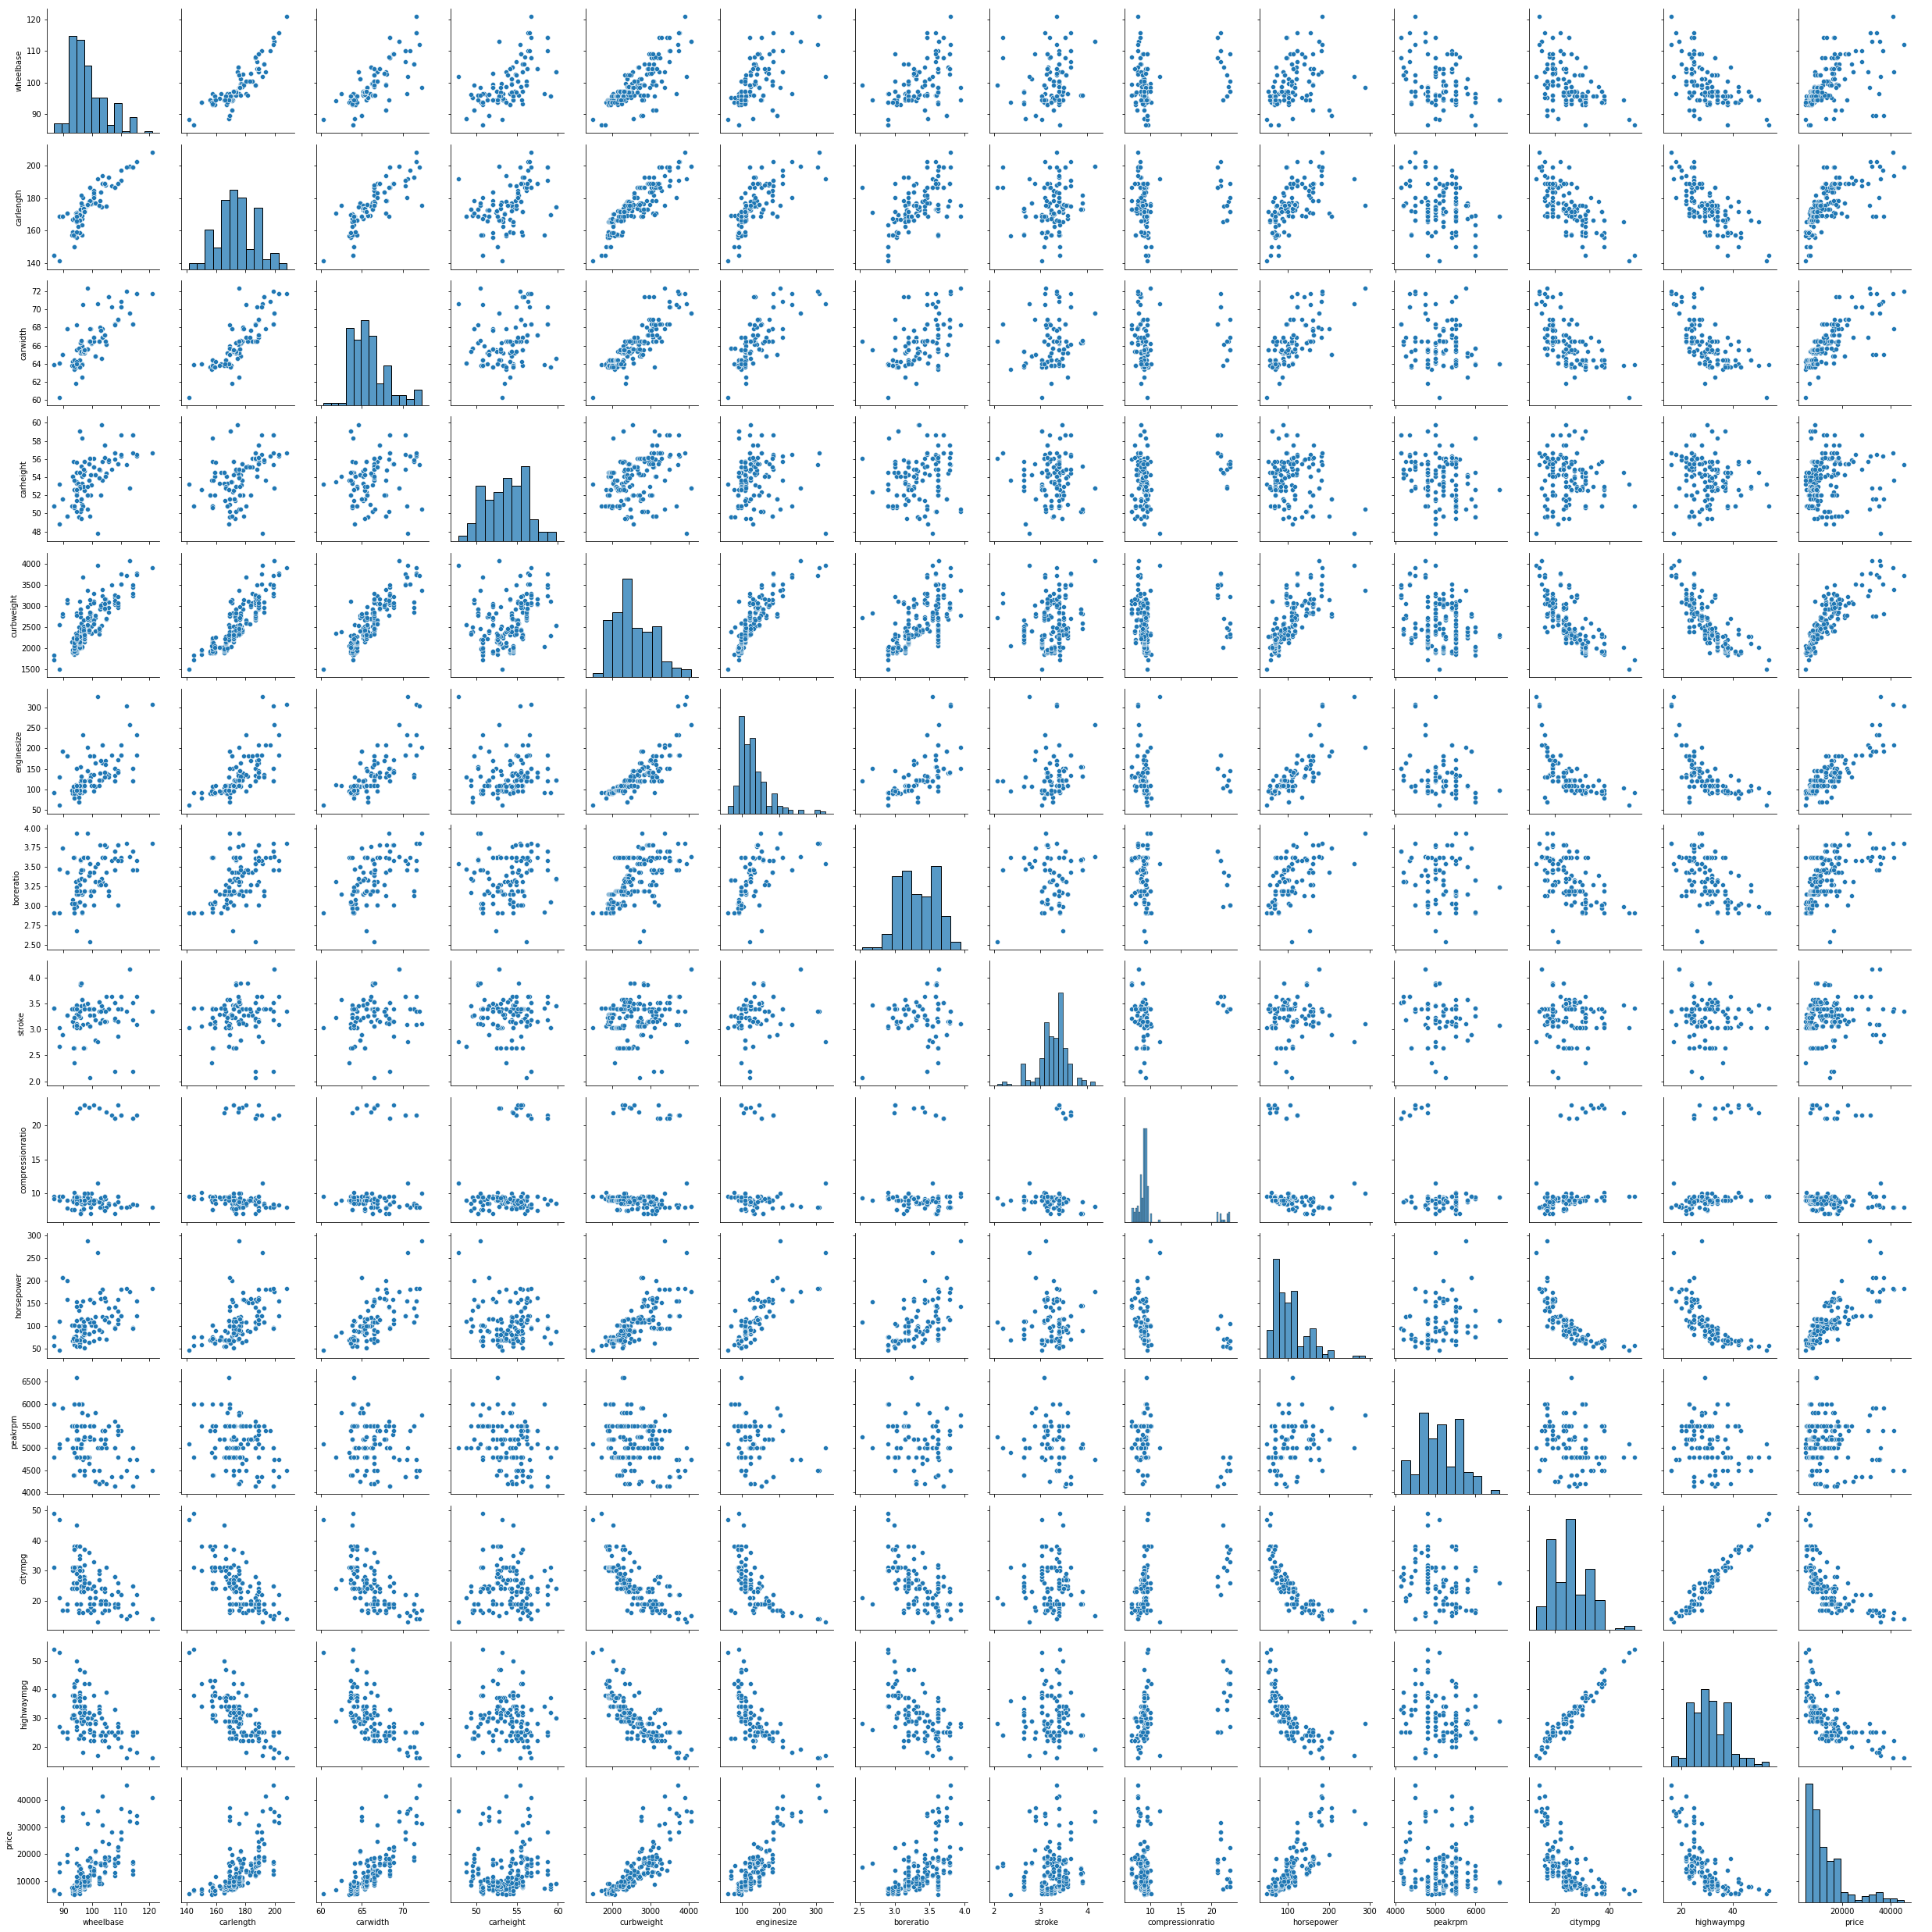

In [26]:
# Pair plot for all the numeric variables
ax = sns.pairplot(df_num)

- __As is shown in the pair plot, it seems that "wheelbase", "carlength", "carwidth", "curbweight", "enginesize", "boreratio" and "horsepower" are positively correlated with the response variable (price)__

- __on the contrary, "citympg" and "highwaympg" seem to have negative correlation with "price"__

- __it seems that "carheight" and "peakpm" do not have any significant correlation with "price"__

In [27]:
df_cat.columns

Index(['CarCompany', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem',
       'cylindernumber'],
      dtype='object')

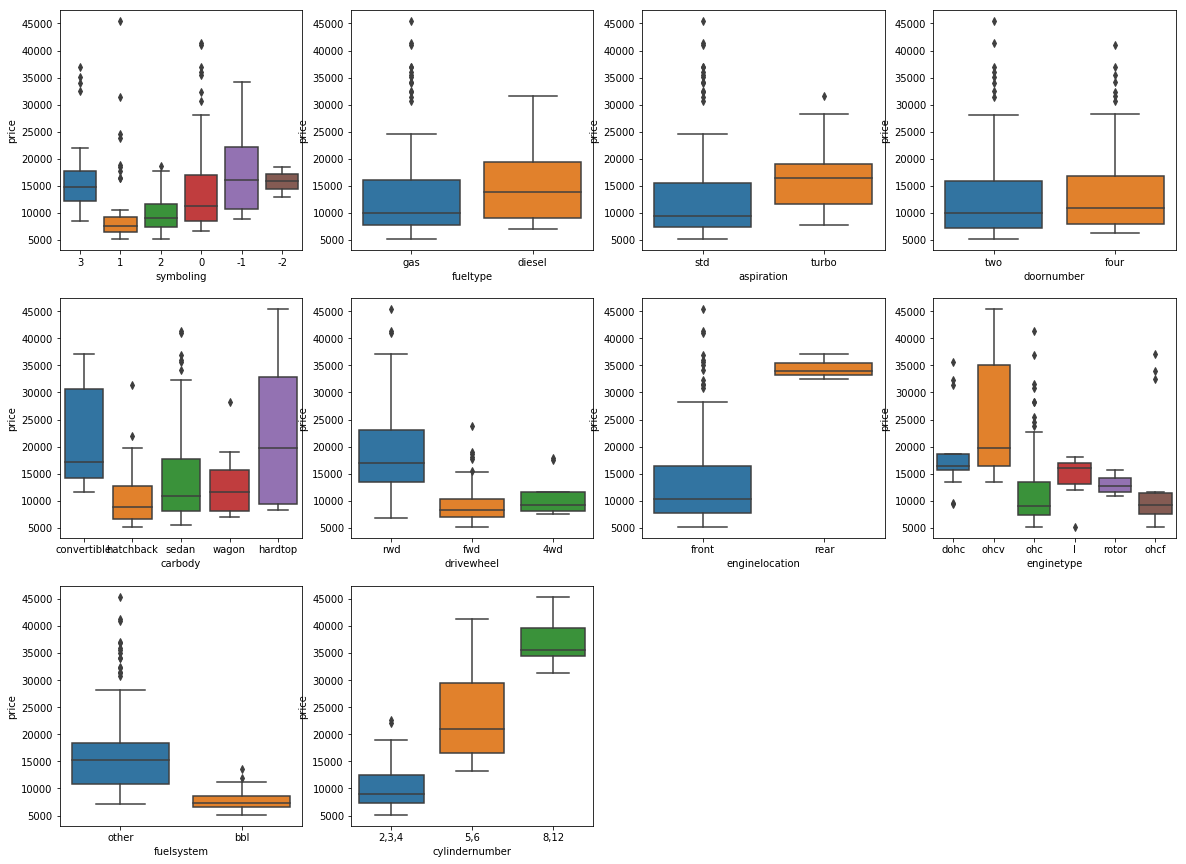

In [28]:
#Box  plot for all the categorical variables
plt.figure(figsize=(20, 15))
plt.subplot(3,4,1)
sns.boxplot(x = 'symboling', y = 'price', data = df)
plt.subplot(3,4,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,4,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,4,4)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,4,5)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,4,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,4,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,4,8)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,4,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.subplot(3,4,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.show()

- __For "symboling", a value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.__

- __on average, The cars with fueltype as diesel are more expensive than those with gas__

- __the cars with "turbo aspirations" have considerably higher average price than those with "std"__

- __there is no significant difference between cars with two or four "doornumber"__

- __generally, cars that have convertible and hardtop body, have wider range of prices than others__

- __cars with "rwd drivewheel" have significantly higher average prices than those with fwd and 4wd drivewheel__

- __on average, the cars with "rear engine locations" are considerably more expensive than those with "fron engine locations"__

- __cars with "ohcv engine type" have higher average prices than the others__

- __cars with "bbl fuel system" have lower average price than the care with other type of fuel system__

- __by increasing the number of cylinder, the price of cars rises__

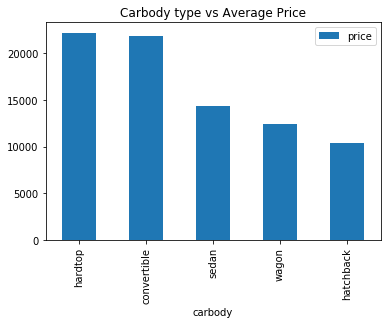

In [29]:
CarBody = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
CarBody.plot.bar()
plt.title('Carbody type vs Average Price')
plt.show()

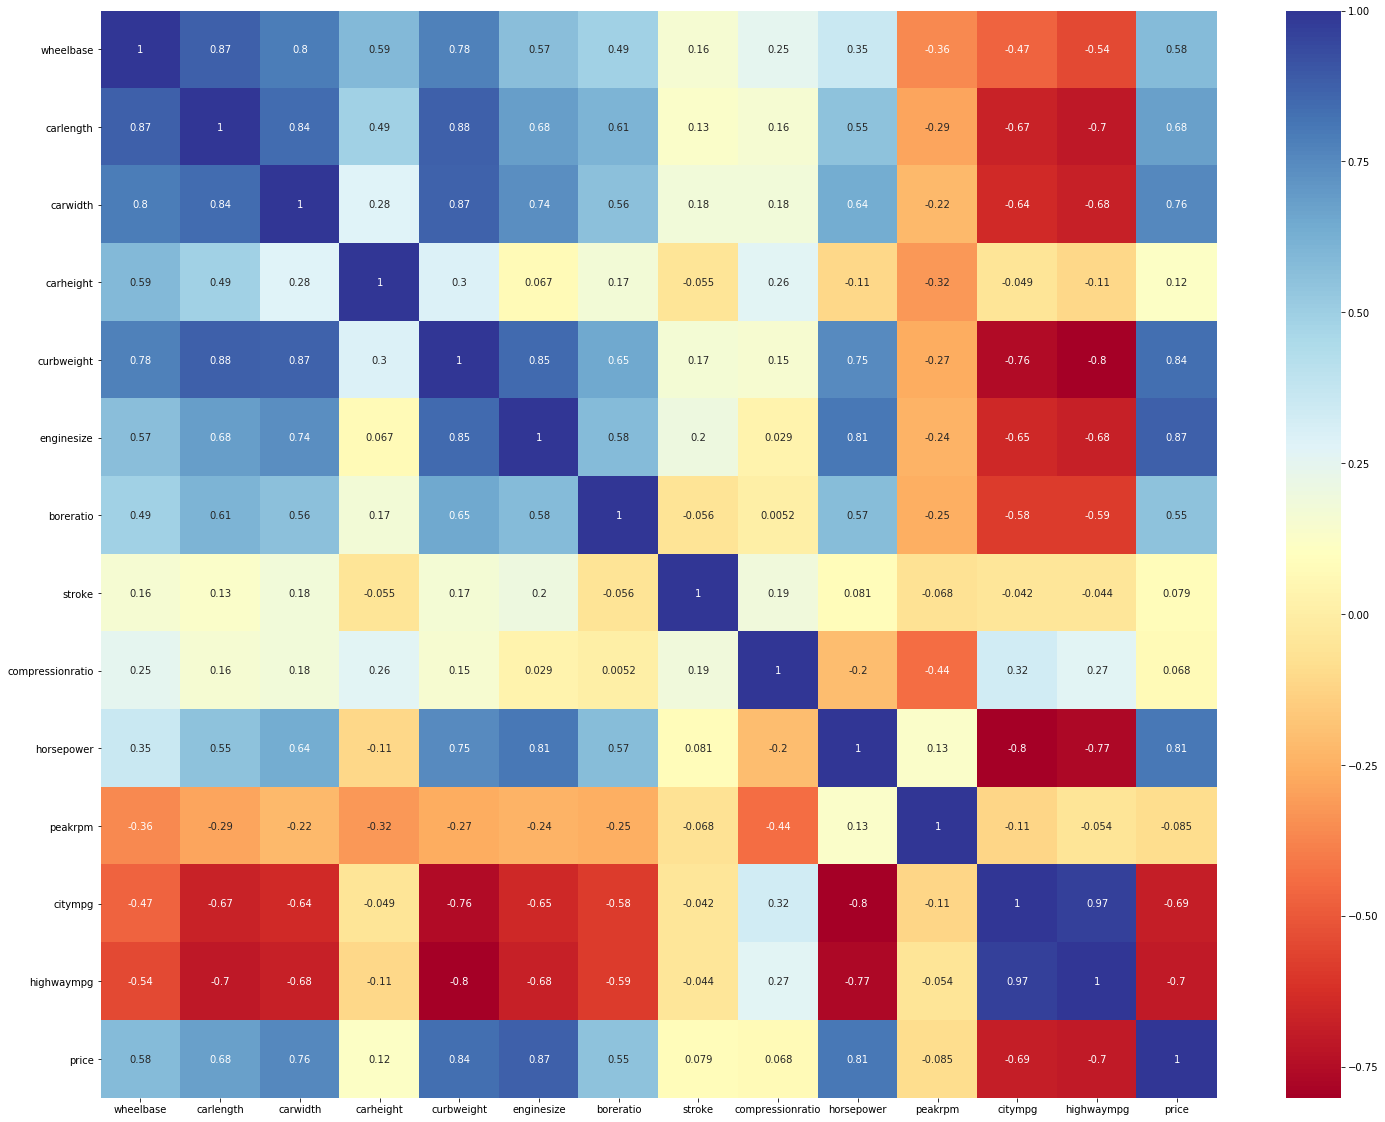

In [43]:
#Checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 20))
sns.heatmap(df.corr(), cmap="RdYlBu",annot=True)
plt.show()

__There are many independent variables which are highly correlated: wheelbase, carlength, curbweight, enginesize etc.. all are positively correlated.__


In [30]:
#As the levels for CarCompany is too many and the frequency for some of them is low, it is better to categorize them to 
#larger groups. We can bin Car Companies by their average price.  
df['price'] = df['price'].astype('int')
df_temp = df.copy()
t = df_temp.groupby(['CarCompany'])['price'].mean()
df_temp = df_temp.merge(t.reset_index(), how='left',on='CarCompany')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
df['Cars_Category'] = pd.cut(df_temp['price_y'],bins,right=False,labels=label)
df.head()

,CarCompany,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fuelsystem,cylindernumber,price,Cars_Category
0,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,3.47,2.68,9.0,111,5000,21,27,other,"2,3,4",13495,Medium_Range
1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,3.47,2.68,9.0,111,5000,21,27,other,"2,3,4",16500,Medium_Range
2,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,152,2.68,3.47,9.0,154,5000,19,26,other,"5,6",16500,Medium_Range
3,audi,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,109,3.19,3.40,10.0,102,5500,24,30,other,"2,3,4",13950,Medium_Range
4,audi,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,136,3.19,3.40,8.0,115,5500,18,22,other,"5,6",17450,Medium_Range


In [31]:
#we collect some variables that seems more significant, according to the visualizations.
col = ['price','Cars_Category','enginetype','enginelocation','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
           'symboling',"wheelbase","carlength","carwidth","curbweight","enginesize","boreratio","horsepower","carheight","peakrpm"]
df1 = df[col]
df1.shape

(205, 19)

<font size="5"> __Data Preperation:__</font>

In [32]:
#it is better to convert categorical variables into numerical variables, using Dummy Function. 
cat_col=['Cars_Category','enginetype','enginelocation','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'symboling']
dummies=pd.get_dummies(df[cat_col], drop_first = True)
dummies.shape

(205, 23)

In [33]:
df1 = pd.concat([df1, dummies], axis = 1)
df1.drop(cat_col, axis=1, inplace=True)

In [34]:
df1.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,carheight,peakrpm,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,enginelocation_rear,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,"cylindernumber_5,6","cylindernumber_8,12",drivewheel_fwd,drivewheel_rwd,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3
0,13495,88.6,168.8,64.1,2548,130,3.47,111,48.8,5000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,16500,88.6,168.8,64.1,2548,130,3.47,111,48.8,5000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,16500,94.5,171.2,65.5,2823,152,2.68,154,52.4,5000,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,13950,99.8,176.6,66.2,2337,109,3.19,102,54.3,5500,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,176.6,66.4,2824,136,3.19,115,54.3,5500,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [35]:
df1.shape

(205, 33)

<font size="5"> __Splitting the Data into Training and Testing Sets:__</font>

In [52]:
#deviding the dataset into train and test datasets
df_train, df_test = train_test_split(df1, test_size = 0.3, random_state = 100)

In [53]:
#it is better to rescale the variables so that they have a comparable scale
scaler = preprocessing.StandardScaler()
num_col = ["wheelbase","carlength","carwidth","curbweight","enginesize","boreratio","horsepower","carheight","peakrpm",'price']
#Applying scaler() to all the columns except the 'dummy' variables
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_train.sample(5)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,carheight,peakrpm,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,enginelocation_rear,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,"cylindernumber_5,6","cylindernumber_8,12",drivewheel_fwd,drivewheel_rwd,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3
57,0.075667,-0.542519,-0.351823,-0.063387,-0.284685,-1.346004,0.086847,-0.039219,-1.629424,1.813910,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
141,-0.762285,-0.222704,-0.112855,-0.199352,-0.726883,-0.415328,1.201877,-0.519216,-0.433667,-0.688236,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
12,1.017222,0.450588,0.269493,-0.471282,0.314126,0.956196,0.009948,0.466040,0.308527,-1.835053,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0
116,0.629031,1.578353,1.058087,1.160299,1.312757,0.662298,1.509472,-0.190797,1.298119,-2.043565,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
196,0.376450,0.972390,1.225364,0.616439,0.728687,0.392891,1.817067,0.289199,1.091954,0.562837,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0


In [54]:
# Dividing train dataset into X and y sets for model building
y_train = df_train.pop('price')
X_train = df_train

__Variable Selection:__

In [59]:
#Performing variable selection using Recursive Feature Elimination
lr = LinearRegression()
lr.fit(X_train,y_train)

#Subsetting training data for 15 selected columns
rfe = RFE(lr,15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=15, step=1, verbose=0)

In [60]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 6),
 ('carlength', False, 17),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 5),
 ('boreratio', False, 3),
 ('horsepower', True, 1),
 ('carheight', False, 16),
 ('peakrpm', False, 12),
 ('Cars_Category_Medium_Range', True, 1),
 ('Cars_Category_TopNotch_Cars', True, 1),
 ('enginetype_l', False, 15),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 2),
 ('enginetype_ohcv', False, 10),
 ('enginetype_rotor', True, 1),
 ('enginelocation_rear', True, 1),
 ('fueltype_gas', False, 14),
 ('aspiration_turbo', False, 7),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('cylindernumber_5,6', False, 9),
 ('cylindernumber_8,12', False, 11),
 ('drivewheel_fwd', False, 8),
 ('drivewheel_rwd', True, 1),
 ('symboling_-2', True, 1),
 ('symboling_0', False, 13),
 ('symboling_1', False, 4),
 ('symboling_2', False, 18),
 ('symboling_3', True, 1)]

In [61]:
cols = X_train.columns[rfe.support_]
cols

Index(['carwidth', 'curbweight', 'horsepower', 'Cars_Category_Medium_Range',
       'Cars_Category_TopNotch_Cars', 'enginetype_ohc', 'enginetype_rotor',
       'enginelocation_rear', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_rwd', 'symboling_-2',
       'symboling_3'],
      dtype='object')

<font size="5"> __Building the Model:__</font>

<font size="4"> __Model 1__</font>

In [64]:
X1 = X_train[cols]
X1_sm = sm.add_constant(X1)
lr_1 = sm.OLS(y_train,X1_sm).fit()

In [65]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.6
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           2.91e-68
Time:                        10:32:51   Log-Likelihood:                -5.9683
No. Observations:                 143   AIC:                             43.94
Df Residuals:                     127   BIC:                             91.34
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

__'carbody_wagon','symboling_-2','symboling_3' and 'enginetype_rotor' have P-value higher than 0.50, which means we cannot reject the null hypothesis (the variable has no effect on the model).__

In [66]:
# we also calculate VIF (Variance Inflation Factor) for detecting multicollinearity
vif = pd.DataFrame()
vif['variables'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,variables,VIF
1,curbweight,9.15
5,enginetype_ohc,5.72
0,carwidth,5.20
10,carbody_sedan,4.21
12,drivewheel_rwd,4.16
2,horsepower,3.50
9,carbody_hatchback,3.19
4,Cars_Category_TopNotch_Cars,3.00
3,Cars_Category_Medium_Range,2.63
14,symboling_3,1.99


__It is always desirable to have VIF value as small as possible, but it can lead to many significant independent variables to be removed from the dataset. Therefore we consider a VIF = 5 as a threshold. In this model, 'curbweight', 'enginetype_ohc' and 'carwidth' have VIF higher than 5. However, removing these variables manually is time consuming; so, we would prefer to diminish the number of variable, using RFE (Recursive Feature Elimination)- this time with only 10 variables.__

In [67]:
lr2 = LinearRegression()

rfe2 = RFE(lr2,10)
rfe2.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=10, step=1, verbose=0)

In [68]:
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))

[('wheelbase', False, 11),
 ('carlength', False, 22),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 10),
 ('boreratio', False, 8),
 ('horsepower', True, 1),
 ('carheight', False, 21),
 ('peakrpm', False, 17),
 ('Cars_Category_Medium_Range', False, 3),
 ('Cars_Category_TopNotch_Cars', True, 1),
 ('enginetype_l', False, 20),
 ('enginetype_ohc', False, 5),
 ('enginetype_ohcf', False, 7),
 ('enginetype_ohcv', False, 15),
 ('enginetype_rotor', True, 1),
 ('enginelocation_rear', True, 1),
 ('fueltype_gas', False, 19),
 ('aspiration_turbo', False, 12),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('cylindernumber_5,6', False, 14),
 ('cylindernumber_8,12', False, 16),
 ('drivewheel_fwd', False, 13),
 ('drivewheel_rwd', False, 6),
 ('symboling_-2', False, 2),
 ('symboling_0', False, 18),
 ('symboling_1', False, 9),
 ('symboling_2', False, 23),
 ('symboling_3', False, 4)]

In [70]:
cols = X_train.columns[rfe2.support_]
cols

Index(['carwidth', 'curbweight', 'horsepower', 'Cars_Category_TopNotch_Cars',
       'enginetype_rotor', 'enginelocation_rear', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon'],
      dtype='object')

<font size="4"> __Model 2__</font>

In [71]:
X2 = X_train[cols]
X2_sm = sm.add_constant(X2)

model_2 = sm.OLS(y_train,X2_sm).fit()

In [72]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           5.81e-71
Time:                        10:45:39   Log-Likelihood:                -13.146
No. Observations:                 143   AIC:                             48.29
Df Residuals:                     132   BIC:                             80.88
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

__p-value for 'enginetype_rotor' and 'carbody_hardtop' are higher than 0.05.__

In [73]:
# Now we check the VIF for this model.
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,curbweight,6.81
0,carwidth,4.62
2,horsepower,3.15
3,Cars_Category_TopNotch_Cars,1.87
5,enginelocation_rear,1.68
6,carbody_hardtop,1.51
7,carbody_hatchback,1.30
8,carbody_sedan,1.23
9,carbody_wagon,1.15
4,enginetype_rotor,1.10


__VIF for 'curbweight' is higher than 5. Now we build another model by removing "enginetype_rotor".__

<font size="4"> __Model 3__</font>

In [74]:
X3 = X2.drop(['enginetype_rotor'], axis =1)
X3_sm = sm.add_constant(X3)

Model_3 = sm.OLS(y_train,X3_sm).fit()

In [75]:
print(Model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     189.9
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           2.23e-71
Time:                        10:55:51   Log-Likelihood:                -14.992
No. Observations:                 143   AIC:                             49.98
Df Residuals:                     133   BIC:                             79.61
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [76]:
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,curbweight,6.81
0,carwidth,4.61
2,horsepower,3.15
3,Cars_Category_TopNotch_Cars,1.86
4,enginelocation_rear,1.68
5,carbody_hardtop,1.51
7,carbody_sedan,1.23
6,carbody_hatchback,1.20
8,carbody_wagon,1.15


__We drop column 'curbweight'.__

<font size="4"> __Model 4__</font>

In [78]:
X4 = X3.drop(['curbweight'], axis =1)
X4_sm = sm.add_constant(X4)

Model_4 = sm.OLS(y_train,X4_sm).fit()

In [79]:
print(Model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     171.0
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           1.97e-66
Time:                        10:59:04   Log-Likelihood:                -30.104
No. Observations:                 143   AIC:                             78.21
Df Residuals:                     134   BIC:                             104.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [80]:
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,horsepower,2.44
0,carwidth,2.34
2,Cars_Category_TopNotch_Cars,1.78
3,enginelocation_rear,1.67
4,carbody_hardtop,1.51
6,carbody_sedan,1.22
5,carbody_hatchback,1.08
7,carbody_wagon,1.02


__let us drop 'carbody_hardtop'.__

<font size="4"> __Model 5__</font>

In [81]:
X5 = X4.drop(['carbody_hardtop'], axis =1)
X5_sm = sm.add_constant(X5)

Model_5 = sm.OLS(y_train,X5_sm).fit()

In [82]:
print(Model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     190.4
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           1.05e-66
Time:                        11:02:28   Log-Likelihood:                -32.283
No. Observations:                 143   AIC:                             80.57
Df Residuals:                     135   BIC:                             104.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [83]:
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,horsepower,2.44
0,carwidth,2.33
2,Cars_Category_TopNotch_Cars,1.78
5,carbody_sedan,1.22
3,enginelocation_rear,1.19
4,carbody_hatchback,1.08
6,carbody_wagon,1.02


__Now, all the VIF & p values seem to be in good range.__

<font size="5"> __Residual Analysis:__</font>

In [85]:
y_train_pred = Model_5.predict(X5_sm)
y_train_pred.head()

122   -0.716623
125    1.706777
166   -0.516172
1     -0.032556
199    0.516249
dtype: float64

In [86]:
Residual = y_train- y_train_pred

C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Su

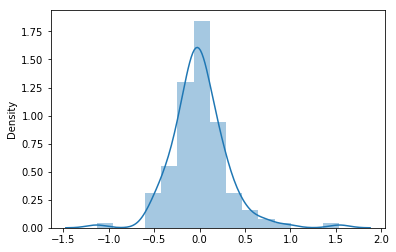

In [87]:
sns.distplot(Residual, bins =15)

__it seems that the residuals are in Normal shape. However, we can use 'shapiro-wilk test' to test whether the residuals are normally distributed or not.__

In [89]:
#shapiro-wilk test for normality
from scipy.stats import shapiro
stat, p = shapiro(Residual)
p

8.202857770811534e-07

__The null hypothesis for this test is that the data are normally distributed. So, as the p-value is greater than 0.05 (8.2), we cannot reject the null hypothesis and we can infer that the Residulas are normally distributed.__

__Now we need to make predictions on our model.__

In [93]:
df_test[num_col] = scaler.transform(df_test[num_col])

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [94]:
y_test = df_test.pop('price')
X_test = df_test

In [95]:
final_cols = X5.columns

In [96]:
X_test_model5= X_test[final_cols]
X_test_model5.head()

,carwidth,horsepower,Cars_Category_TopNotch_Cars,enginelocation_rear,carbody_hatchback,carbody_sedan,carbody_wagon
160,-0.652569,-0.822372,0,0,0,1,0
186,-0.154030,-0.443427,0,0,0,1,0
59,0.299187,-0.468690,0,0,1,0,0
165,-0.833856,0.238673,0,0,0,1,0
140,-0.924500,-0.746583,0,0,1,0,0


In [97]:
X_test_sm = sm.add_constant(X_test_model5)

In [98]:
y_pred = Model_5.predict(X_test_sm)

In [99]:
y_pred.head()

160   -0.597075
186   -0.292864
59    -0.290684
165   -0.351622
140   -0.843656
dtype: float64

In [100]:
y_pred.shape

(62,)

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


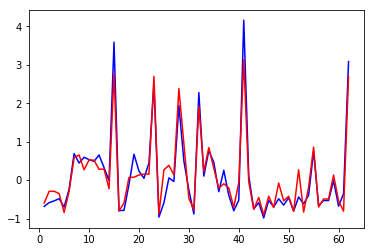

In [101]:
c = [i for i in range(1,63,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, y_pred,color = 'red')

Text(0, 0.5, 'y_pred')

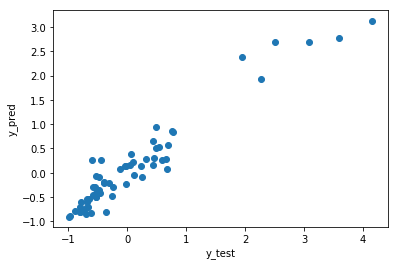

In [102]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

<font size="5"> __Model Evaluation:__</font>

In [107]:
k=X_test.shape[1]
n=len(X_test)

In [116]:
RMSE=float(format(np.sqrt(mean_squared_error(y_test,y_pred)),'0.3f'))
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
r2_adjusted=1-(1-r2)*(n-1)/(n-k-1)

In [117]:
print('RMSE=', RMSE,'\nMSE=', MSE,'\nMAE=', MAE, '\nr2=', r2, '\nr2_adjusted=', r2_adjusted)

RMSE= 0.31 
MSE= 0.09607003684953726 
MAE= 0.22335123947070126 
r2= 0.9169702714463995 
r2_adjusted= 0.8253512606286335


In [119]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 10,forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

In [120]:
list(zip(X_train.columns,sfs1.get_support()))

AttributeError: 'SequentialFeatureSelector' object has no attribute 'get_support'

In [118]:
#https://github.com/SMQuadri/Geely-Car-Price-Prediction/blob/master/Car%20Price%20Prediction.ipynb
#https://medium.com/@analystsam007/prediction-model-1bc5ea113231